Here are the questions I would like to explore in this dataset:
1. Did people in higer ticket class have a higher survival rate?
2. Among people survived, how many were female and how many were male?
3. What is the relationship among 'Sex', 'Pclass' and survival rate?
4. Is 'SibSp' and 'Parch' correlated?

## Load Data From CSV


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic_data = pd.read_csv('/Users/chenpinghsuan/Documents/nanodegree/P2/titanic-data.csv')

After loading the data into jupyter notebook, it is easier to use pandas to have a quick overview of the data. I use `.head()` to quickly glimpse what are the fields thats included in this data set.

In [2]:
# See the first few entries of this dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# See the length of this dataset
len(titanic_data)

891

## Quick Overview & Data cleaning

In this section I mainly use `descibe()` function to take glimpse at the loaded data, and do some cleaning.

### PassengerId

As 'PassengerID' is actually not a numeric field, it would be better to convert this field into string to avoid confusion.

In [4]:
titanic_data['PassengerId'] = titanic_data['PassengerId'].astype(str)

### Survived

In [5]:
# Make sure all entries have 'Survived' value
titanic_data['Survived'].count()

891

As '0' denotes died and '1' denotes survived, take the `sum()` of all values in 'Survived' will tell us how many passengers survived in this dataset. The summing tells among the 891 entries, 342 passengers survived.

In [6]:
titanic_data['Survived'].sum()

342

### Pclass

In [7]:
# Make sure all entries have 'Pclass' value
titanic_data['Pclass'].count()

891

In [8]:
# Calculate how many passengers were in class 1, 2, 3 respectively
titanic_data.groupby('Pclass')['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

### Age

In [9]:
# Make sure all entries have 'Age' value
titanic_data['Age'].count()

714

I found that there are 891-714=177 entries that are without "Age" information, and this could cause problem analysing data with 'Age', because about 21% of the passenger record did not have the information specified. 
To solve issue of missing 'Age', with the trade off of not confidently representing the actual state of passengers' age, I replace the missing Age with the current age median.

In [10]:
# Calculate median of all existing 'Age' data, adn safe to 'age_med'
age_med = np.median(titanic_data['Age'][titanic_data['Age'].notnull()])

# Replace missing Age with 'age_med'
titanic_data['Age'].fillna(age_med, inplace=True)

# Check if the change apply correcting by checking if all entries have 'Age' value again
titanic_data['Age'].count()

891

I also want to know some more information about the age of passengers on board. Use of `.descibe()` and boxplot could come in handy.

In [11]:
titanic_data['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

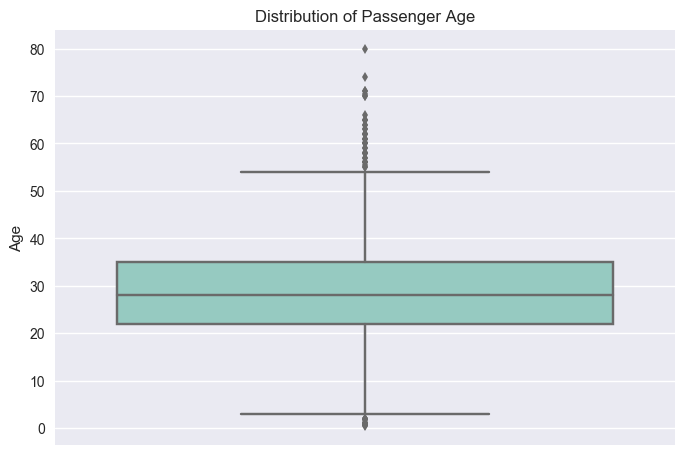

In [12]:
age_frame = titanic_data['Age'].to_frame()
sns.boxplot(x="Age",orient= "v", data=age_frame, palette="Set3").set_title('Distribution of Passenger Age')

### SibSp

In [13]:
# Make sure all entries have 'SibSp' value
titanic_data['SibSp'].count()

891

In [14]:
# Describe the attribute
titanic_data['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

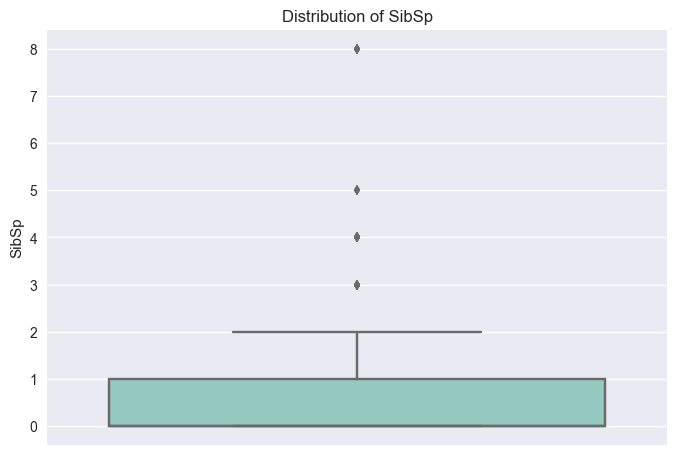

In [15]:
# Visualize the field
age_frame = titanic_data['SibSp'].to_frame()
sns.boxplot(x="SibSp",orient= "v", data=age_frame, palette="Set3").set_title('Distribution of SibSp')

### Parch

In [16]:
# Make sure all entries have 'Parch' value
titanic_data['Parch'].count()

891

In [17]:
# Describe the attribute
titanic_data['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

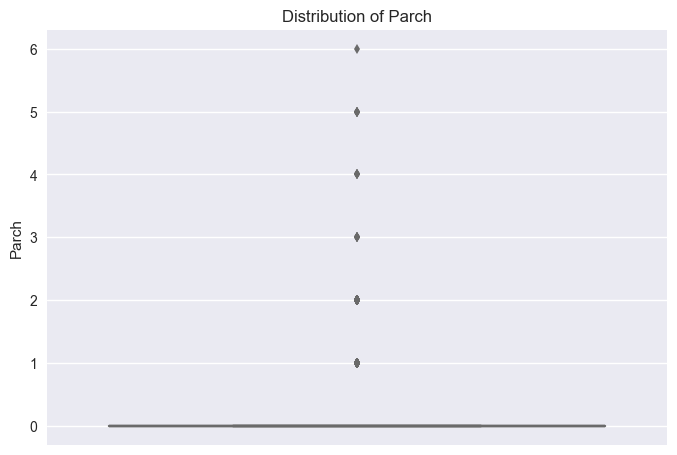

In [18]:
# Visualize the field
age_frame = titanic_data['Parch'].to_frame()
sns.boxplot(x="Parch",orient= "v", data=age_frame, palette="Set3").set_title('Distribution of Parch')

### Fare

In [19]:
# Make sure all entries have 'Fare' value
titanic_data['Fare'].count()

891

In [20]:
# Describe the attribute
titanic_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

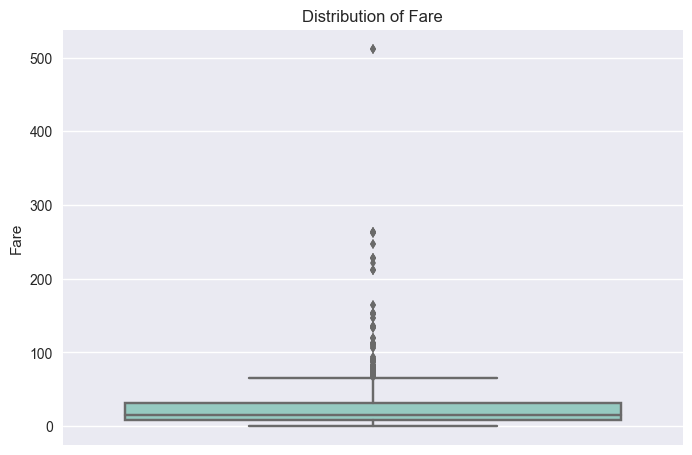

In [21]:
# Visualize the field
age_frame = titanic_data['Fare'].to_frame()
sns.boxplot(x="Fare",orient= "v", data=age_frame, palette="Set3").set_title('Distribution of Fare')

In [22]:
# Finally, describe the whole dataset
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Initially Understanding Data

So now I have grasped an idea what the dataset look like, it's time to go further. As in Titanic data, the thing that's concerned most is the survival. So when going further into this dataset, I use seaborn's pairplot to visulize the relationships among variables with 'Survived' as mapping plot aspects. Note that in 'Survived' field, "0" means died, while "1" means survived; therefore in the pairplot below, pink means died, while green means survived.

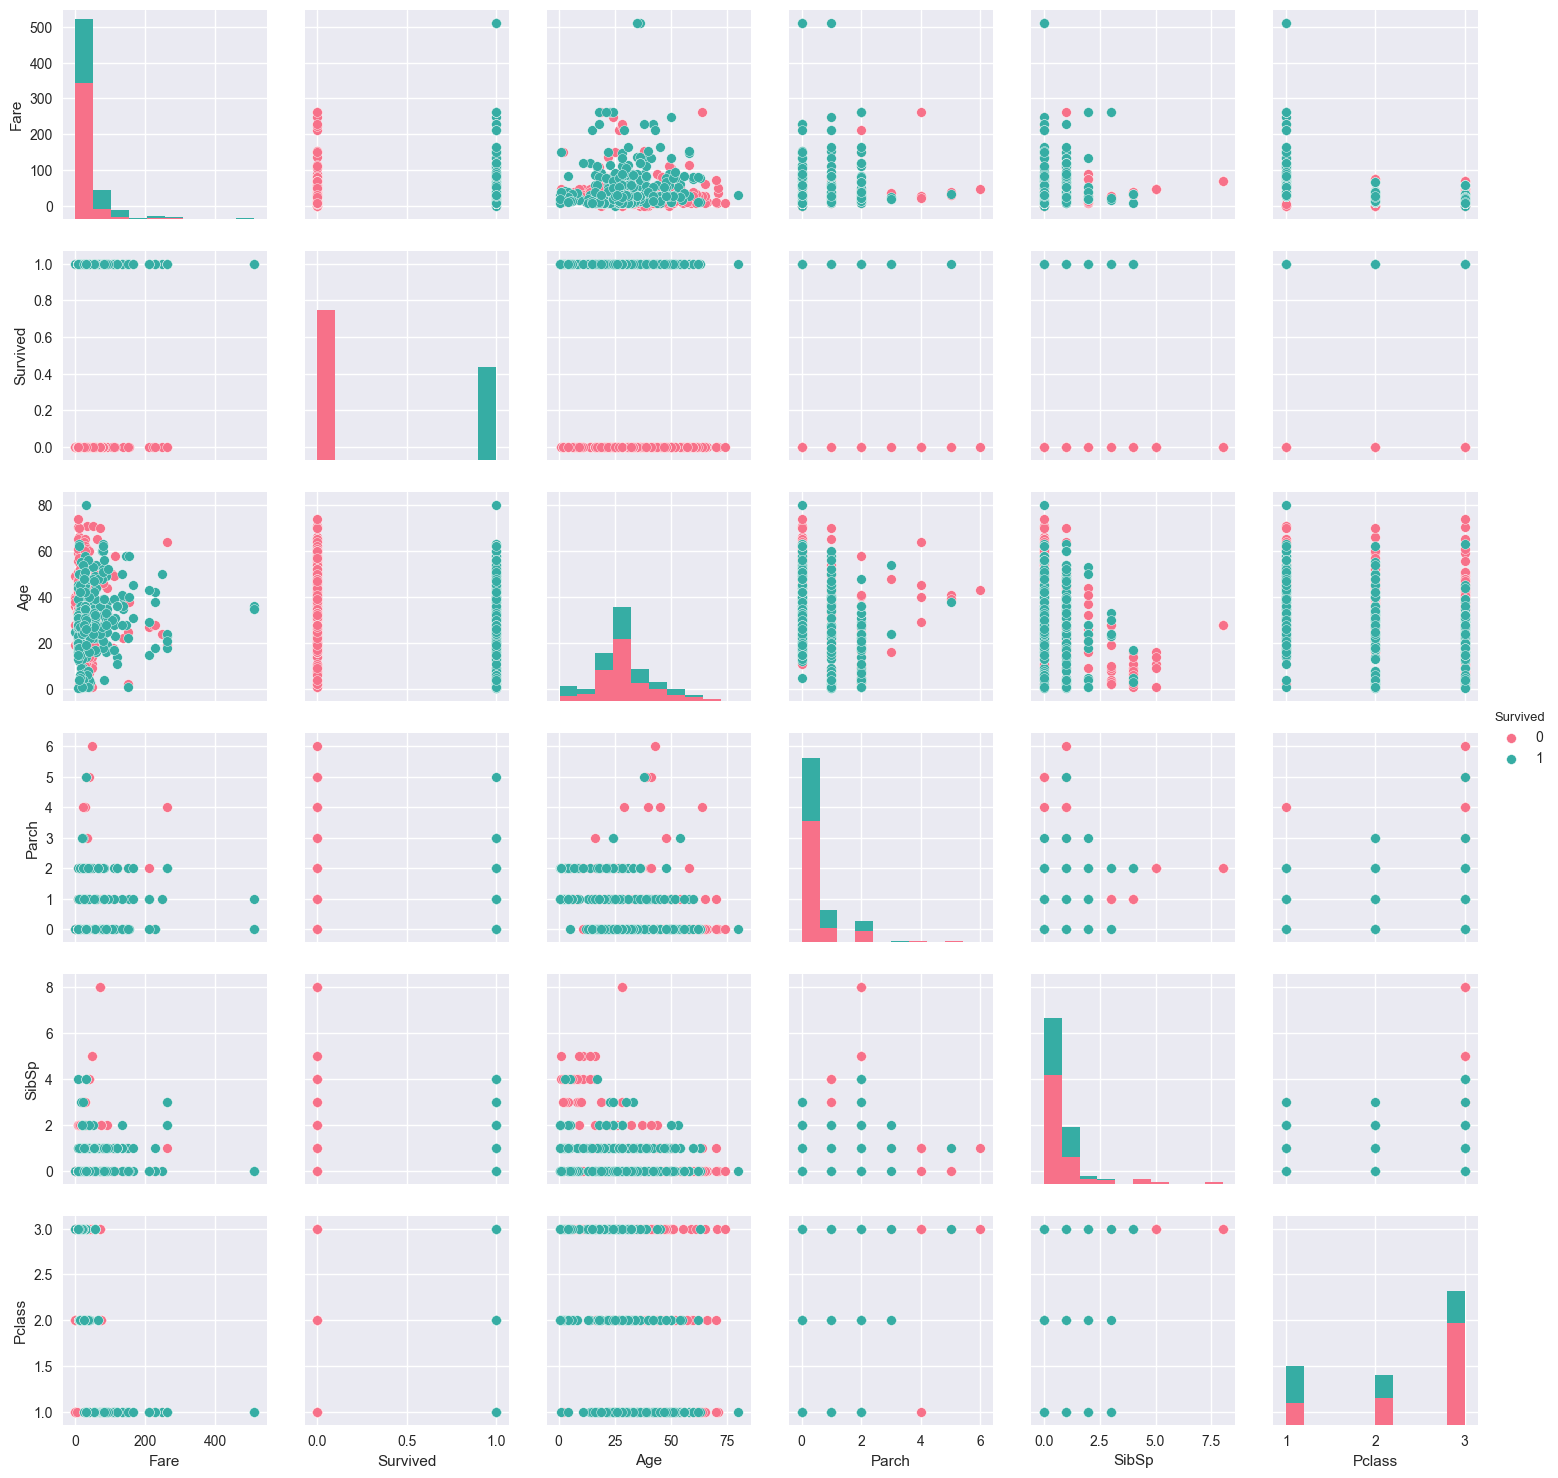

In [23]:
plt.figure()
sns.pairplot(data=titanic_data[['Fare','Survived','Age','Parch','SibSp','Pclass']],
             hue='Survived', dropna=True, palette='husl')

Apart from visualization in pairploy, I use `.corr()` to see the correlation of 'survived' and other numeric fields, and visulize the result in a bar chart. 

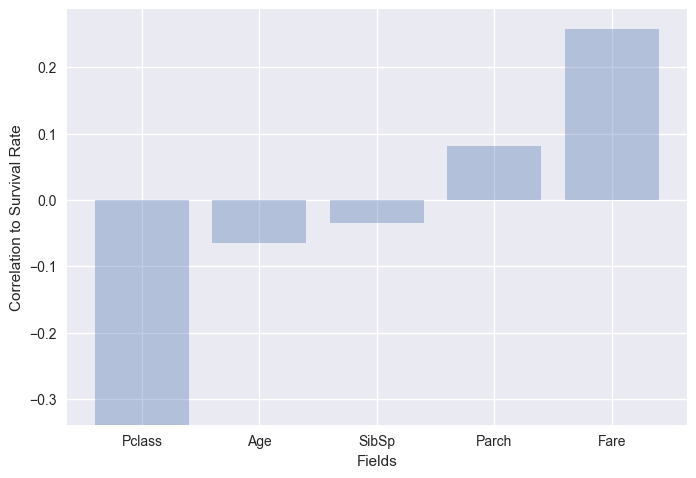

In [24]:
# Calculating correlation
survived_corr = titanic_data.corr()['Survived'][1:]

# Plotting bar chart
corr_labels = ('Pclass','Age','SibSp','Parch','Fare')
corr_pos = np.arange(len(survived_corr))
survived_corr_value = survived_corr.values

plt.bar(corr_pos, survived_corr_value,align='center', alpha=0.35)
plt.xticks(corr_pos, corr_labels)
plt.ylabel('Correlation to Survival Rate')
plt.xlabel('Fields')

## Investigating Further

The correlation bar chart shows that 'Pclass' has highest correlation (in absolute value) with 'Survived'. So I decide to look further on this attribute.

### Pclass

I use `.groupby()` to group 'Pclass' and take the `.mean()` of 'Survival' to know the survival rate in different ticket classes; and then visualize the result in a bar chart.


In [25]:
# Calculate the survival rate in each ticket classes: 1 means 100% survival rate, and 0 means 0% survival rate

titanic_data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

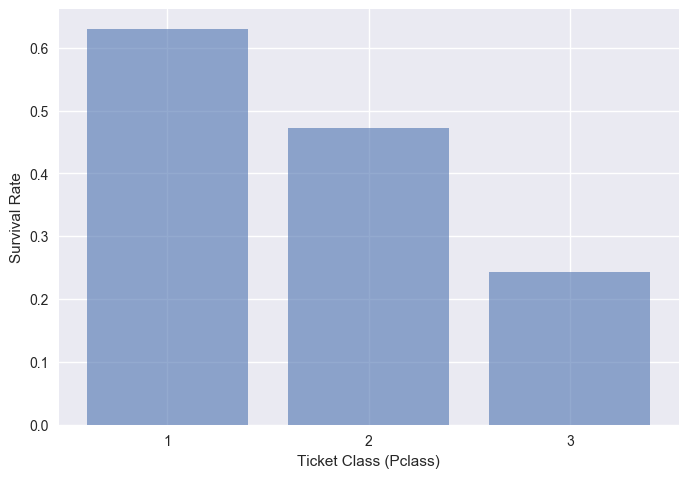

In [26]:
pclass_labels = ('1','2','3')
class_pos = np.arange(len(pclass_labels))
pclass_survival_rate = titanic_data.groupby('Pclass')['Survived'].mean().values

    
plt.bar(class_pos, pclass_survival_rate, align='center', alpha=0.6)
plt.xticks(class_pos, pclass_labels)
plt.ylabel('Survival Rate')
plt.xlabel('Ticket Class (Pclass)')
 
plt.show()

'Pclass' shows a consistent relationship between and survival rate - the 'better' the ticket class is, the higher the survival rate. But why did passengers in first (1) ticket class have a higher chance to survive? Could be first class cabin was nearer to the lifeboat location, or passengers who bought first class ticket are put in life boats first. As the dataset did not reveal such information, these are just guesses.

### Sex

I also want to see **among people survived, how many were female and how many were male**. To closely look at the survival rate, I use `.groupby()` to group data into the field that I want to see, and use pandas' built-in function to calculate the sum of 'Survived' - which gives me the number of survived male and female repectively.

In [27]:
titanic_data.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

Knowing the number of survival of male and female respectively, I want to see the percentage of sex in all the survived passengers. So I use pie chart to present the number: among all survived people, 68.1% were female, and 31.9% were male. This make sense if the rule to board lifeboat is 'Ladies first'.

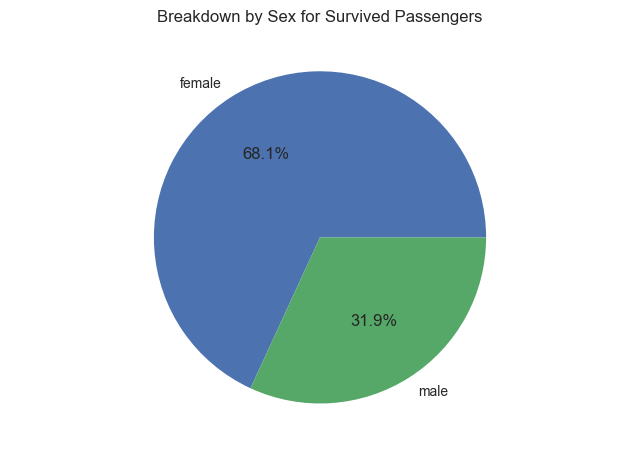

In [28]:
sex = [titanic_data.groupby('Sex')['Survived'].sum()['female'], titanic_data.groupby('Sex')['Survived'].sum()['male']]
label_sex = ['female', 'male']

plt.axis('equal')
plt.pie(sex,labels=label_sex,autopct="%1.1f%%")
plt.title('Breakdown by Sex for Survived Passengers')
plt.show()

## Investigating denpendent variables


### 'Pclass' and 'Sex'

Having looking at 'Pclass' and 'Sex' respectively, I wonder if analyzed together, there will be some findings for these two variables.

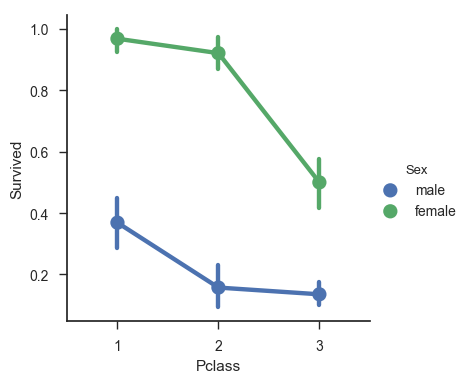

In [29]:
# Slice out 'Pclass','Sex','Survived' for better manupulation
titanic_data_sliced = titanic_data[['Pclass','Sex','Survived']]

# Visualize the average survival rate, grouped by sex and Pclass
sns.set(style="ticks")
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=titanic_data_sliced)

Looking the graph above, it seems Pclass and sex effect the survival coherently, but sex looks to play a more important role - survival rate of class 1 female > class 2 female > class 3 female > class 1 male > class 2 male > class 3 male. If a male passenger travel in class 3, he only had less than 20% percentage to survive.


### 'SibSp' and 'Parch'

Since variable 'sibsp' and 'parch' both have something to do with the number of other people aboard, I am also curious whether these two variables are dependent. 

First I use `.corr()` to examine the correlation of these two variables, and it seems comparing to other variables(average .031 correlation), 'sibsp' and 'parch' have a higher correlation (.41 correlation). Looks like people travel with parents/kids are more likely to travel with siblings/spouse than those who travel without family members.

In [30]:
# The correlation for 'sibsp' and 'parch'
print 'Correlation for sibsp and parch is %s' %titanic_data.corr()['Parch']['SibSp']

# Calculate the correlation of 'parch' and other variables, not including 'sibsp'
parch_corr = titanic_data.corr()['Parch'].drop('Parch').drop('SibSp')
print 'Average correlation for parch and other variable is %s' %parch_corr.mean()


Correlation for sibsp and parch is 0.41483769862
Average correlation for parch and other variable is 0.035953767282


## Conclusion

To sum up, the four questions I bring up at the beginning of explorations are answered:

1. Did people in higer ticket class have a higher survival rate?
<br>Yes.
2. Among people survived, how many were female and how many were male?
<br>68.1% were female, and 31.9% were male.
3. What is the relationship among 'Sex', 'Pclass' and survival rate?
<br>Pclass and sex effect the survival coherently, but sex looks to play a more important role. 
4. Is 'SibSp' and 'Parch' correlated?
<br>Yes, more correlated than other variables does.


These conclusions are inferred by simple data analysis tools built in pandas and numpy, they are **tentative as there were no statistical tests conducted**.

Another thing to note is there might be survivor bias in this dataset; also looking up wikipedia, there are more than 891 passengers onboard Titanic, so this dataset might not be representative enough.

### References

+ [Udacity DAND forum](https://discussions.udacity.com/c/nd002-intro-to-data-analysis)
+ [Stack Overflow](http://stackoverflow.com/)
+ [Numpy Documentation](https://docs.scipy.org/doc/numpy/index.html)
+ [Pandas Documentation](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#lists)
+ [Matplotlib Documentation](https://matplotlib.org/index.html)
+ [Kaggle](https://www.kaggle.com)
+ [Seaborn Documentation](http://seaborn.pydata.org)